# Marina Leonard

# Taylor Swift Lyric Analysis

## Contents

This data was from shaynak on github

## Set Up

In [163]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Important functionality for this lesson
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

# modelling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#evaluations
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [164]:
original_lyric_df = pd.read_csv('data/taylor_lyrics_full.csv')

In [165]:
lyric_df = original_lyric_df.copy()

## Cleaning

### Removing unnecessary columns

In [166]:
lyric_df.nunique()

Title     257
Album      24
Lyrics    257
dtype: int64

### Duplicates

Check that there are no duplicate rows / songs. 

In [167]:
lyric_df.duplicated().sum()

0

However, in this database, there are no repeated lines. This must have been done before.

In [168]:
lyric_df.head()

,Title,Album,Lyrics
0,Tim McGraw,Taylor Swift,He said the way my blue eyes shined\nPut those...
1,Picture to Burn,Taylor Swift,"State the obvious, I didn't get my perfect fan..."
2,Teardrops On My Guitar,Taylor Swift,Drew looks at me\nI fake a smile so he won't s...
3,A Place In This World,Taylor Swift,"I don't know what I want, so don't ask me\n'Ca..."
4,Cold as You,Taylor Swift,You have a way of coming easily to me\nAnd whe...


In [169]:
print(f'There are {lyric_df.shape[0]} rows and {lyric_df.shape[1]} columns in this dataset.')

There are 257 rows and 3 columns in this dataset.


### Null and NA Values

In [170]:
lyric_df.isna().sum().sum()

0

In [171]:
lyric_df.isnull().sum().sum()

0

There are no NA or Null values

## EDA

### Albums

We can filter by albums.

In [172]:
number_of_albumns = lyric_df['Album'].nunique()

In [173]:
list_of_albumns = list(lyric_df['Album'].unique())

In [174]:
print(f'There are {number_of_albumns} albums in this Dataset')

print('They are :')

for item in list_of_albumns:
    print(item)

There are 24 albums in this Dataset
They are :
Taylor Swift
Beautiful Eyes
Fearless (Taylor's Version)
Speak Now (Taylor's Version)
Red (Taylor's Version)
1989 (Taylor's Version)
reputation
Lover
folklore
evermore
Midnights
The Tortured Poets Department
The Taylor Swift Holiday Collection
The Hunger Games
How Long Do You Think It's Gonna Last
Cats
Where The Crawdads Sing
Christmas Tree Farm
Fifty Shades Darker
Miss Americana
Love Drunk
Women in Music Part III
Two Lanes of Freedom
The Hannah Montana Movie


### Album with Most Songs

In [175]:
lyric_df['Album'].value_counts().sort_values(ascending=False)

Album
The Tortured Poets Department            31
Red (Taylor's Version)                   29
Fearless (Taylor's Version)              26
1989 (Taylor's Version)                  23
Midnights                                23
Speak Now (Taylor's Version)             22
Lover                                    19
folklore                                 17
evermore                                 17
reputation                               15
Taylor Swift                             14
The Taylor Swift Holiday Collection       6
Cats                                      2
Beautiful Eyes                            2
The Hunger Games                          2
How Long Do You Think It's Gonna Last     1
Where The Crawdads Sing                   1
Christmas Tree Farm                       1
Fifty Shades Darker                       1
Miss Americana                            1
Love Drunk                                1
Women in Music Part III                   1
Two Lanes of Freedom      

<Axes: ylabel='Album'>

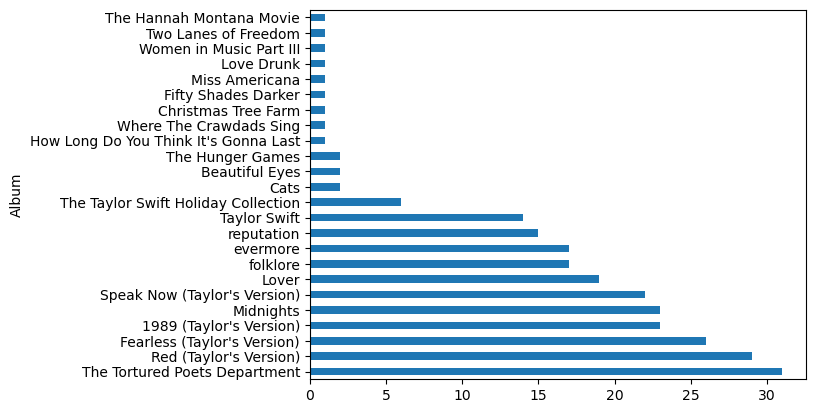

In [176]:
lyric_df['Album'].value_counts().sort_values(ascending=False).plot(kind='barh')

The album with the most songs is The Tortured Poets Department

### Album with longest average song

In [177]:
lyric_df['Song_word_length'] = lyric_df['Lyrics'].apply(lambda x : len(x.split(' ')))

In [178]:
lyric_df.head()

,Title,Album,Lyrics,Song_word_length
0,Tim McGraw,Taylor Swift,He said the way my blue eyes shined\nPut those...,314
1,Picture to Burn,Taylor Swift,"State the obvious, I didn't get my perfect fan...",263
2,Teardrops On My Guitar,Taylor Swift,Drew looks at me\nI fake a smile so he won't s...,258
3,A Place In This World,Taylor Swift,"I don't know what I want, so don't ask me\n'Ca...",207
4,Cold as You,Taylor Swift,You have a way of coming easily to me\nAnd whe...,218


In [179]:
lyric_df['Song_character_length'] = lyric_df['Lyrics'].apply(lambda x : len(x))
lyric_df.head()

,Title,Album,Lyrics,Song_word_length,Song_character_length
0,Tim McGraw,Taylor Swift,He said the way my blue eyes shined\nPut those...,314,1865
1,Picture to Burn,Taylor Swift,"State the obvious, I didn't get my perfect fan...",263,1586
2,Teardrops On My Guitar,Taylor Swift,Drew looks at me\nI fake a smile so he won't s...,258,1496
3,A Place In This World,Taylor Swift,"I don't know what I want, so don't ask me\n'Ca...",207,1130
4,Cold as You,Taylor Swift,You have a way of coming easily to me\nAnd whe...,218,1258


In [180]:
lyric_df.groupby('Album')['Song_word_length'].mean().sort_values(ascending=False)

Album
How Long Do You Think It's Gonna Last    439.000000
reputation                               424.866667
Two Lanes of Freedom                     402.000000
1989 (Taylor's Version)                  382.304348
Fifty Shades Darker                      369.000000
Speak Now (Taylor's Version)             353.681818
Red (Taylor's Version)                   338.517241
Lover                                    326.210526
Cats                                     308.000000
evermore                                 305.823529
Fearless (Taylor's Version)              302.192308
The Tortured Poets Department            300.000000
Midnights                                298.695652
Love Drunk                               279.000000
folklore                                 262.705882
Christmas Tree Farm                      252.000000
Miss Americana                           251.000000
Taylor Swift                             248.500000
Women in Music Part III                  216.000000
Beauti

<Axes: ylabel='Album'>

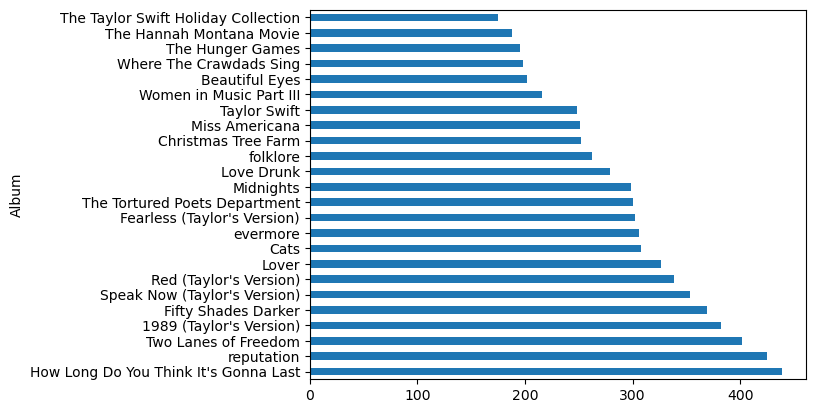

In [181]:
lyric_df.groupby('Album')['Song_word_length'].mean().sort_values(ascending=False).plot(kind='barh')

The album with the longest average song by word count is 'How Long Do You Think It's Gonna Last' by Big Red Machine. The album with the longest average song by Taylor Swift is reputation.

In [182]:
lyric_df.groupby('Album')['Song_character_length'].mean().sort_values(ascending=False)

Album
How Long Do You Think It's Gonna Last    2657.000000
reputation                               2495.200000
Two Lanes of Freedom                     2416.000000
Fifty Shades Darker                      2286.000000
1989 (Taylor's Version)                  2244.391304
Speak Now (Taylor's Version)             2105.409091
Red (Taylor's Version)                   2033.689655
Lover                                    1968.210526
Cats                                     1936.000000
Midnights                                1883.130435
evermore                                 1873.352941
The Tortured Poets Department            1847.838710
Fearless (Taylor's Version)              1800.384615
Christmas Tree Farm                      1721.000000
Love Drunk                               1636.000000
folklore                                 1586.411765
Miss Americana                           1578.000000
Taylor Swift                             1492.500000
The Hunger Games                        

<Axes: ylabel='Album'>

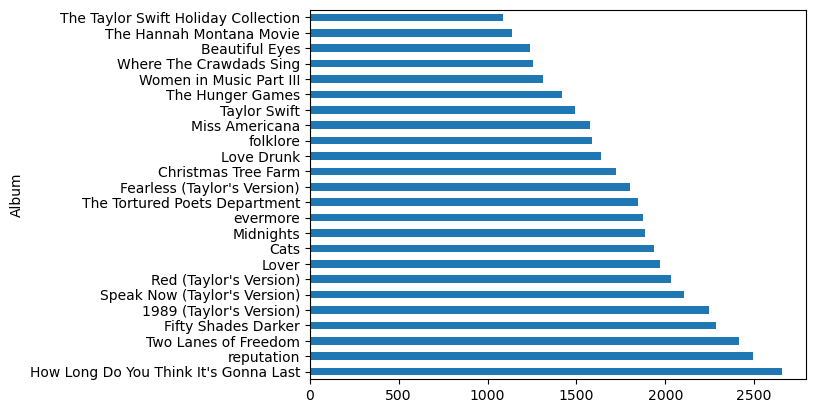

In [183]:
lyric_df.groupby('Album')['Song_character_length'].mean().sort_values(ascending=False).plot(kind='barh')

### Most Common Words and Bigrams

In [184]:
lyrics_only_df = lyric_df['Lyrics']

#### Single Words

In [185]:
# count vectorizer with no maximum number of tokens. 

count_v = CountVectorizer( min_df=1, stop_words='english')

# fit to the lyrics
count_v.fit(lyrics_only_df)

# transform

lyrics_transformed = count_v.transform(lyrics_only_df)
# pos_X_test_transformed = pos_count_v.transform(pos_X_test)

# check shape - should be 500 columns and same rows as before
print(f" The shape of lyrics_only is {lyrics_transformed.shape}")


 The shape of lyrics_only is (257, 4618)


In [186]:
lyric_data = lyrics_transformed.todense()
lyric_words = count_v.get_feature_names_out()

In [187]:
total_lyrics_df = pd.DataFrame(data = lyric_data, columns= lyric_words)

In [188]:
total_lyrics_df.head()

,05,1500s,16th,17,1830s,1944,1950s,1958,2003,29th,...,yelling,yes,yesterday,yogurt,yon,york,young,younger,youth,zayn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

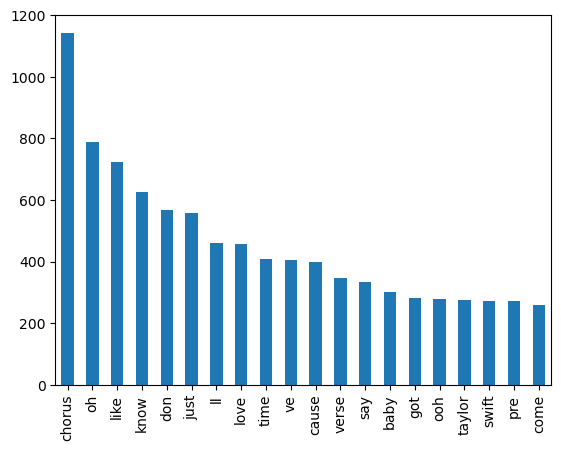

In [189]:
total_lyrics_df.sum().sort_values(ascending=False).head(20).plot(kind = 'bar')

#### Bigrams

In [190]:
# count vectorizer with no maximum number of tokens. 

count_v_bigram = CountVectorizer( max_features=500, min_df=1, stop_words='english', ngram_range=(2,2))

# fit to the lyrics
count_v_bigram.fit(lyrics_only_df)

# transform

lyrics_transformed_bigram = count_v_bigram.transform(lyrics_only_df)
# pos_X_test_transformed = pos_count_v.transform(pos_X_test)

# check shape - should be 500 columns and same rows as before
print(f" The shape is {lyrics_transformed_bigram.shape}")

 The shape is (257, 500)


In [191]:
lyric_data_bigram = lyrics_transformed_bigram.todense()
lyric_words_bigram = count_v_bigram.get_feature_names_out()

total_lyrics_df_bigram = pd.DataFrame(data = lyric_data_bigram, columns= lyric_words_bigram)

In [192]:
total_lyrics_df_bigram.sum().sort_values(ascending=False).head(20)

oh oh            302
taylor swift     273
pre chorus       272
post chorus      139
chorus taylor     98
ah ah             92
don know          91
ooh ooh           89
ve got            72
di di             72
don wanna         71
chorus cause      70
shake shake       58
come come         57
la la             50
wish wish         48
chorus oh         47
just wanna        46
chorus don        45
love love         42
dtype: int64

<Axes: >

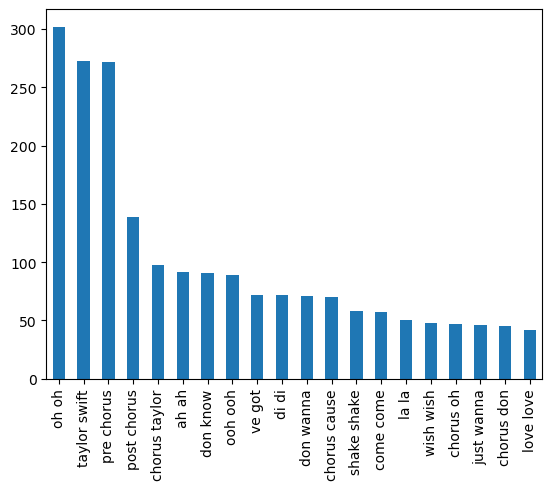

In [193]:
total_lyrics_df_bigram.sum().sort_values(ascending=False).head(20).plot(kind = 'bar')

There are many repeated words. 
- We need to remove 'chorus' as it will not be part of the lyrics. 
- We also need to remove 'Taylor' and 'Swift' as these may be part of the song credits
- We also need to replace '\n' with a space as the count vectoriser is treating this as a word.

### Fixing the lyrics to vectorise

#### replacing '\n' with a space

In [194]:
lyric_df['Lyrics_new'] = lyric_df['Lyrics'].apply(lambda x : re.sub("\n", repl= " ", string=x))
lyric_df.head(10)

,Title,Album,Lyrics,Song_word_length,Song_character_length,Lyrics_new
0,Tim McGraw,Taylor Swift,He said the way my blue eyes shined\nPut those...,314,1865,He said the way my blue eyes shined Put those ...
1,Picture to Burn,Taylor Swift,"State the obvious, I didn't get my perfect fan...",263,1586,"State the obvious, I didn't get my perfect fan..."
2,Teardrops On My Guitar,Taylor Swift,Drew looks at me\nI fake a smile so he won't s...,258,1496,Drew looks at me I fake a smile so he won't se...
3,A Place In This World,Taylor Swift,"I don't know what I want, so don't ask me\n'Ca...",207,1130,"I don't know what I want, so don't ask me 'Cau..."
4,Cold as You,Taylor Swift,You have a way of coming easily to me\nAnd whe...,218,1258,You have a way of coming easily to me And when...
5,The Outside,Taylor Swift,I didn't know what I would find\nWhen I went l...,200,1182,I didn't know what I would find When I went lo...
6,Tied Together with a Smile,Taylor Swift,Seems the only one who doesn't see your beauty...,218,1347,Seems the only one who doesn't see your beauty...
7,Stay Beautiful,Taylor Swift,"Cory's eyes are like a jungle\nHe smiles, it's...",216,1469,"Cory's eyes are like a jungle He smiles, it's ..."
8,Should've Said No,Taylor Swift,It's strange to think the songs we used to sin...,304,1852,It's strange to think the songs we used to sin...
9,Mary's Song (Oh My My My),Taylor Swift,She said I was seven and you were nine\nI look...,293,1636,She said I was seven and you were nine I looke...


#### Removing 'Chorus' and 'Taylor Swift'

In [195]:
lyric_df['Lyrics_new'] = lyric_df['Lyrics_new'].apply(lambda x : re.sub("Chorus", repl= " ", string=x))
lyric_df.head(10)

,Title,Album,Lyrics,Song_word_length,Song_character_length,Lyrics_new
0,Tim McGraw,Taylor Swift,He said the way my blue eyes shined\nPut those...,314,1865,He said the way my blue eyes shined Put those ...
1,Picture to Burn,Taylor Swift,"State the obvious, I didn't get my perfect fan...",263,1586,"State the obvious, I didn't get my perfect fan..."
2,Teardrops On My Guitar,Taylor Swift,Drew looks at me\nI fake a smile so he won't s...,258,1496,Drew looks at me I fake a smile so he won't se...
3,A Place In This World,Taylor Swift,"I don't know what I want, so don't ask me\n'Ca...",207,1130,"I don't know what I want, so don't ask me 'Cau..."
4,Cold as You,Taylor Swift,You have a way of coming easily to me\nAnd whe...,218,1258,You have a way of coming easily to me And when...
5,The Outside,Taylor Swift,I didn't know what I would find\nWhen I went l...,200,1182,I didn't know what I would find When I went lo...
6,Tied Together with a Smile,Taylor Swift,Seems the only one who doesn't see your beauty...,218,1347,Seems the only one who doesn't see your beauty...
7,Stay Beautiful,Taylor Swift,"Cory's eyes are like a jungle\nHe smiles, it's...",216,1469,"Cory's eyes are like a jungle He smiles, it's ..."
8,Should've Said No,Taylor Swift,It's strange to think the songs we used to sin...,304,1852,It's strange to think the songs we used to sin...
9,Mary's Song (Oh My My My),Taylor Swift,She said I was seven and you were nine\nI look...,293,1636,She said I was seven and you were nine I looke...


In [196]:
lyric_df['Lyrics_new'] = lyric_df['Lyrics_new'].apply(lambda x : re.sub("Taylor", repl= " ", string=x))
lyric_df.head(10)

,Title,Album,Lyrics,Song_word_length,Song_character_length,Lyrics_new
0,Tim McGraw,Taylor Swift,He said the way my blue eyes shined\nPut those...,314,1865,He said the way my blue eyes shined Put those ...
1,Picture to Burn,Taylor Swift,"State the obvious, I didn't get my perfect fan...",263,1586,"State the obvious, I didn't get my perfect fan..."
2,Teardrops On My Guitar,Taylor Swift,Drew looks at me\nI fake a smile so he won't s...,258,1496,Drew looks at me I fake a smile so he won't se...
3,A Place In This World,Taylor Swift,"I don't know what I want, so don't ask me\n'Ca...",207,1130,"I don't know what I want, so don't ask me 'Cau..."
4,Cold as You,Taylor Swift,You have a way of coming easily to me\nAnd whe...,218,1258,You have a way of coming easily to me And when...
5,The Outside,Taylor Swift,I didn't know what I would find\nWhen I went l...,200,1182,I didn't know what I would find When I went lo...
6,Tied Together with a Smile,Taylor Swift,Seems the only one who doesn't see your beauty...,218,1347,Seems the only one who doesn't see your beauty...
7,Stay Beautiful,Taylor Swift,"Cory's eyes are like a jungle\nHe smiles, it's...",216,1469,"Cory's eyes are like a jungle He smiles, it's ..."
8,Should've Said No,Taylor Swift,It's strange to think the songs we used to sin...,304,1852,It's strange to think the songs we used to sin...
9,Mary's Song (Oh My My My),Taylor Swift,She said I was seven and you were nine\nI look...,293,1636,She said I was seven and you were nine I looke...


In [197]:
lyric_df['Lyrics_new'] = lyric_df['Lyrics_new'].apply(lambda x : re.sub("Swift", repl= " ", string=x))
lyric_df.head(10)

,Title,Album,Lyrics,Song_word_length,Song_character_length,Lyrics_new
0,Tim McGraw,Taylor Swift,He said the way my blue eyes shined\nPut those...,314,1865,He said the way my blue eyes shined Put those ...
1,Picture to Burn,Taylor Swift,"State the obvious, I didn't get my perfect fan...",263,1586,"State the obvious, I didn't get my perfect fan..."
2,Teardrops On My Guitar,Taylor Swift,Drew looks at me\nI fake a smile so he won't s...,258,1496,Drew looks at me I fake a smile so he won't se...
3,A Place In This World,Taylor Swift,"I don't know what I want, so don't ask me\n'Ca...",207,1130,"I don't know what I want, so don't ask me 'Cau..."
4,Cold as You,Taylor Swift,You have a way of coming easily to me\nAnd whe...,218,1258,You have a way of coming easily to me And when...
5,The Outside,Taylor Swift,I didn't know what I would find\nWhen I went l...,200,1182,I didn't know what I would find When I went lo...
6,Tied Together with a Smile,Taylor Swift,Seems the only one who doesn't see your beauty...,218,1347,Seems the only one who doesn't see your beauty...
7,Stay Beautiful,Taylor Swift,"Cory's eyes are like a jungle\nHe smiles, it's...",216,1469,"Cory's eyes are like a jungle He smiles, it's ..."
8,Should've Said No,Taylor Swift,It's strange to think the songs we used to sin...,304,1852,It's strange to think the songs we used to sin...
9,Mary's Song (Oh My My My),Taylor Swift,She said I was seven and you were nine\nI look...,293,1636,She said I was seven and you were nine I looke...


### Most Common Words and Bigrams

In [198]:
lyrics_only_df = lyric_df['Lyrics_new']

#### Single Words

In [199]:
# count vectorizer with no maximum number of tokens. 

count_v = CountVectorizer( min_df=1, stop_words='english')

# fit to the lyrics
count_v.fit(lyrics_only_df)

# transform

lyrics_transformed = count_v.transform(lyrics_only_df)
# pos_X_test_transformed = pos_count_v.transform(pos_X_test)

# check shape - should be 500 columns and same rows as before
print(f" The shape of lyrics_only is {lyrics_transformed.shape}")

 The shape of lyrics_only is (257, 4616)


In [200]:
lyric_data = lyrics_transformed.todense()
lyric_words = count_v.get_feature_names_out()

In [201]:
total_lyrics_df = pd.DataFrame(data = lyric_data, columns= lyric_words)

In [202]:
total_lyrics_df.head()

,05,1500s,16th,17,1830s,1944,1950s,1958,2003,29th,...,yelling,yes,yesterday,yogurt,yon,york,young,younger,youth,zayn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

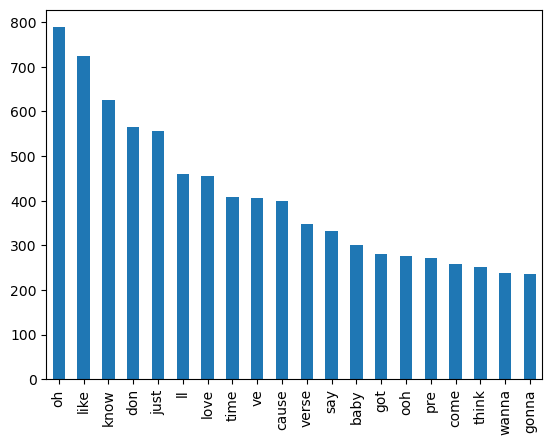

In [203]:
total_lyrics_df.sum().sort_values(ascending=False).head(20).plot(kind = 'bar')

#### Bigrams

In [204]:
# count vectorizer with no maximum number of tokens. 

count_v_bigram = CountVectorizer( max_features=500, min_df=1, stop_words='english', ngram_range=(2,2))

# fit to the lyrics
count_v_bigram.fit(lyrics_only_df)

# transform

lyrics_transformed_bigram = count_v_bigram.transform(lyrics_only_df)
# pos_X_test_transformed = pos_count_v.transform(pos_X_test)

# check shape - should be 500 columns and same rows as before
print(f" The shape is {lyrics_transformed_bigram.shape}")

 The shape is (257, 500)


In [205]:
lyric_data_bigram = lyrics_transformed_bigram.todense()
lyric_words_bigram = count_v_bigram.get_feature_names_out()

total_lyrics_df_bigram = pd.DataFrame(data = lyric_data_bigram, columns= lyric_words_bigram)

In [206]:
total_lyrics_df_bigram.sum().sort_values(ascending=False).head(20)

oh oh          302
ah ah           92
don know        91
ooh ooh         89
di di           72
ve got          72
don wanna       71
shake shake     58
come come       57
la la           50
wish wish       48
just wanna      46
love love       42
hey hey         41
new york        41
stay stay       37
bad blood       36
oh yeah         34
yeah yeah       32
got bad         32
dtype: int64

<Axes: >

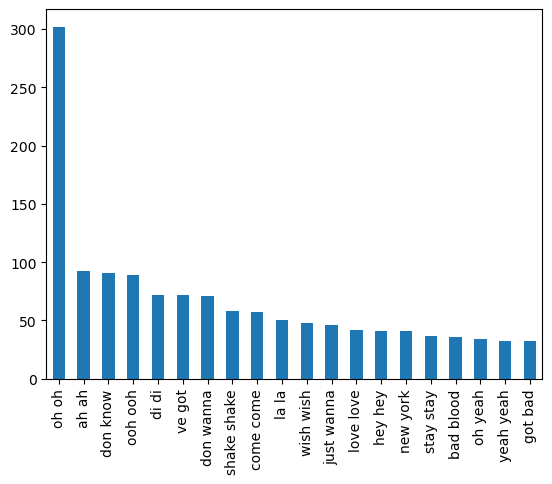

In [207]:
total_lyrics_df_bigram.sum().sort_values(ascending=False).head(20).plot(kind='bar')

In [208]:
total_lyrics_df.T.head(20)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1500s,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16th,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1830s,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1950s,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
29th,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Can we predict the album based on the lyrics?

As there are so many albums in this dataset, we can filter it to just Taylor Swifts main albums. These are Taylor Swift, Fearless, Speak Now, Red, 1989, reputation, Lover, folklore, evermore, midnights, and The Tortured Poets Department.

In [209]:
lyric_df['Album'].unique()

array(['Taylor Swift', 'Beautiful Eyes', "Fearless (Taylor's Version)",
       "Speak Now (Taylor's Version)", "Red (Taylor's Version)",
       "1989 (Taylor's Version)", 'reputation', 'Lover', 'folklore',
       'evermore', 'Midnights', 'The Tortured Poets Department',
       'The Taylor Swift Holiday Collection', 'The Hunger Games',
       "How Long Do You Think It's Gonna Last", 'Cats',
       'Where The Crawdads Sing', 'Christmas Tree Farm',
       'Fifty Shades Darker', 'Miss Americana', 'Love Drunk',
       'Women in Music Part III', 'Two Lanes of Freedom',
       'The Hannah Montana Movie'], dtype=object)

In [210]:
main_albums = ['Taylor Swift',
                "Fearless(Taylor's Version)", 
                "Speak Now (Taylor's Version)", 
                "Red (Taylor's Version)",
                "1989 (Taylor's Version)", 
                'reputation', 
                'Lover', 
                'folklore',
                'evermore', 
                'Midnights', 
                'The Tortured Poets Department']

main_albums_df = lyric_df[lyric_df['Album'].isin(main_albums)]

In [211]:
main_albums_df

,Title,Album,Lyrics,Song_word_length,Song_character_length,Lyrics_new
0,Tim McGraw,Taylor Swift,He said the way my blue eyes shined\nPut those...,314,1865,He said the way my blue eyes shined Put those ...
1,Picture to Burn,Taylor Swift,"State the obvious, I didn't get my perfect fan...",263,1586,"State the obvious, I didn't get my perfect fan..."
2,Teardrops On My Guitar,Taylor Swift,Drew looks at me\nI fake a smile so he won't s...,258,1496,Drew looks at me I fake a smile so he won't se...
3,A Place In This World,Taylor Swift,"I don't know what I want, so don't ask me\n'Ca...",207,1130,"I don't know what I want, so don't ask me 'Cau..."
4,Cold as You,Taylor Swift,You have a way of coming easily to me\nAnd whe...,218,1258,You have a way of coming easily to me And when...
...,...,...,...,...,...,...
232,Robin,The Tortured Poets Department,"Long may you reign\nYou're an animal, you are ...",143,1027,"Long may you reign You're an animal, you are b..."
233,The Manuscript,The Tortured Poets Department,"Now and then, she rereads the manuscript\nOf t...",211,1287,"Now and then, she rereads the manuscript Of th..."
252,Bad Blood (Remix) (Taylor's Version),1989 (Taylor's Version),"'Cause, baby, now we've got bad blood\nYou kno...",543,3218,"'Cause, baby, now we've got bad blood You know..."
253,Paris,Midnights,"""Your ex-friend's sister\nMet someone at a clu...",259,1713,"""Your ex-friend's sister Met someone at a club..."


We now have a dataframe of 210 rows.

In [212]:
main_albums_df = main_albums_df[[ 'Album', 'Lyrics_new']]
main_albums_df.reset_index(inplace=True, drop=True)

In [213]:
main_albums_df

,Album,Lyrics_new
0,Taylor Swift,He said the way my blue eyes shined Put those ...
1,Taylor Swift,"State the obvious, I didn't get my perfect fan..."
2,Taylor Swift,Drew looks at me I fake a smile so he won't se...
3,Taylor Swift,"I don't know what I want, so don't ask me 'Cau..."
4,Taylor Swift,You have a way of coming easily to me And when...
...,...,...
205,The Tortured Poets Department,"Long may you reign You're an animal, you are b..."
206,The Tortured Poets Department,"Now and then, she rereads the manuscript Of th..."
207,1989 (Taylor's Version),"'Cause, baby, now we've got bad blood You know..."
208,Midnights,"""Your ex-friend's sister Met someone at a club..."


We now have a data frame of 11 categories.

We need to count vectorise and do a test train split.

In [ ]:

# my_pipeline = Pipeline(steps = [("scale_values", StandardScaler()), 
#                                 ("reduce_dimensions", PCA(n_components=20, random_state=1)),
#                                 ("decision_tree_model", DecisionTreeClassifier(random_state=1))])

In [ ]:
# params_grid = {'decision_tree_model__max_depth' : [5,10,15],
#                'decision_tree_model__min_samples_leaf' : [5,10],
#                'decision_tree_model__min_samples_split' : [100, 300]}

In [ ]:
# my_grid = GridSearchCV(my_pipeline, param_grid=params_grid, cv=5)